In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import glob
from sklearn import preprocessing

2.1.0


In [2]:
path = r'/home/anish/Backup/College/Solar/Datasets' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, skiprows=2)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
dataset = frame

In [3]:
dataset

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,0,0,-5,168.95,0.128,4.0,0.472,55.7,49.00,5,990.0
1,2016,1,1,0,30,0,0,0,0,-5,166.74,0.128,4.0,0.477,55.7,49.00,5,990.0
2,2016,1,1,1,0,0,0,0,0,-5,162.23,0.128,4.1,0.482,55.7,48.97,5,990.0
3,2016,1,1,1,30,0,0,0,0,-5,156.74,0.128,4.1,0.489,55.7,48.97,5,990.0
4,2016,1,1,2,0,0,0,0,0,-5,150.83,0.128,4.2,0.496,56.0,48.98,5,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,2014,12,31,21,30,0,0,0,0,3,146.19,0.122,0.9,1.036,17.9,65.24,11,990.0
70076,2014,12,31,22,0,0,0,0,0,3,152.26,0.122,1.0,1.037,28.3,62.52,11,990.0
70077,2014,12,31,22,30,0,0,0,0,3,158.09,0.122,1.1,1.029,28.3,62.51,11,990.0
70078,2014,12,31,23,0,0,0,0,0,2,163.41,0.122,1.2,1.022,37.8,59.05,11,990.0


In [4]:
dataset.pop('DNI')
dataset.pop('DHI')

dataset.pop('Year')
dataset.pop('Month')
dataset.pop('Day')
dataset.pop('Precipitable Water')
dataset.pop('Pressure')
dataset.pop('Minute')

0         0
1        30
2         0
3        30
4         0
         ..
70075    30
70076     0
70077    30
70078     0
70079    30
Name: Minute, Length: 70080, dtype: int64

In [5]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_data = preprocessing.normalize(train_dataset)
test_data = preprocessing.normalize(test_dataset)

In [7]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Hour,56064.0,11.500321,6.916577,0.000,6.00,12.000,17.000,23.000
GHI,56064.0,229.407481,314.124226,0.000,0.00,0.000,442.000,1074.000
Cloud Type,56064.0,1.552583,2.441894,0.000,0.00,0.000,3.000,9.000
Dew Point,56064.0,7.988549,5.069446,-14.000,5.00,9.000,11.000,22.000
Solar Zenith Angle,56064.0,89.688545,39.018681,10.670,57.81,89.620,121.840,169.230
Surface Albedo,56064.0,0.132983,0.004046,0.121,0.13,0.134,0.136,0.139
Wind Speed,56064.0,1.974822,1.275748,0.000,1.00,1.600,2.800,10.600
Wind Direction,56064.0,174.401488,97.559902,0.000,76.90,199.800,250.500,360.000
Relative Humidity,56064.0,60.152086,23.762347,6.190,40.84,58.460,80.030,100.000
Temperature,56064.0,18.574290,6.395776,2.000,14.00,18.000,23.000,40.000


In [8]:
train_labels = train_dataset.pop('GHI')
test_labels = test_dataset.pop('GHI')

In [25]:
def norm(x):
 return (x - train_stats['mean']) / train_stats['std']
normed_train_data = preprocessing.normalize(train_dataset)
normed_test_data = preprocessing.normalize(test_dataset)


In [9]:
from tensorflow.keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [10]:
def build_model():
  model = tf.keras.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01),  input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, kernel_regularizer=regularizers.l2(0.01)),
])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae','mse', r2_keras])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [12]:
EPOCHS = 500

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2,verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:10714.9046,  mae:51.8871,  mse:10712.1318,  r2_keras:0.8836,  val_loss:4998.9486,  val_mae:35.9954,  val_mse:4995.9634,  val_r2_keras:0.9441,  
....................................................................................................
Epoch: 100, loss:1889.5467,  mae:18.5149,  mse:1875.4247,  r2_keras:0.9791,  val_loss:2170.2417,  val_mae:19.6091,  val_mse:2156.0422,  val_r2_keras:0.9749,  
....................................................................................................
Epoch: 200, loss:1554.4051,  mae:16.8187,  mse:1528.1133,  r2_keras:0.9827,  val_loss:2343.9514,  val_mae:23.1650,  val_mse:2317.5811,  val_r2_keras:0.9735,  
....................................................................................................
Epoch: 300, loss:1274.7403,  mae:15.4076,  mse:1237.3651,  r2_keras:0.9862,  val_loss:2197.8866,  val_mae:19.1365,  val_mse:2160.4634,  val_r2_keras:0.9750,  
............................................................

In [13]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


In [14]:
from sklearn.preprocessing import MinMaxScaler

model.evaluate(test_dataset, test_labels)
print(test_labels)
model.predict(test_dataset)


14016/14016 [==============================] - 1s 40us/sample - loss: 1984.5169 - mae: 17.0394 - mse: 1929.7281 - r2_keras: 0.9680
5          0
10         0
13         0
21       521
26       548
        ... 
70053    515
70058    544
70063    209
70064    123
70067      0
Name: GHI, Length: 14016, dtype: int64


array([[-8.2289696e-02],
       [ 1.0549555e+00],
       [ 1.0463552e+00],
       ...,
       [ 2.3674823e+02],
       [ 1.2568803e+02],
       [-7.5379372e-02]], dtype=float32)

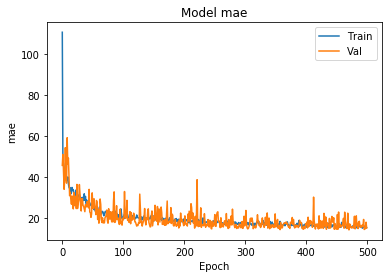

In [20]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.savefig('mae1')
plt.show()


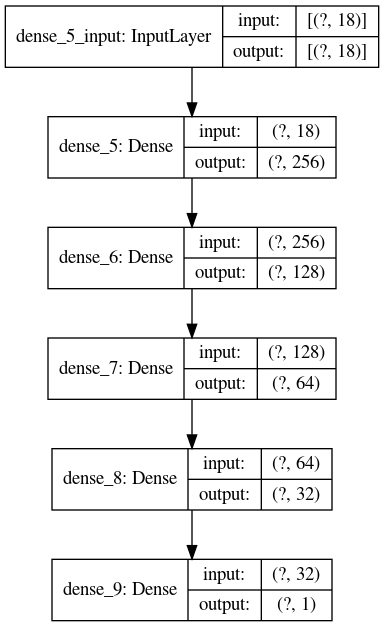

In [15]:
from keras.utils import plot_model
import pydot
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)